# Environment Debugging

This notebook can be used to debug and play around with the environments

In [4]:
import os
import sys
sys.path.append(os.path.dirname((os.path.abspath(""))))

from configs.envs.obstacle_avoidance.experiment_1 import experiment_1_setup
from src.envs.oil_extraction import OilField
from src.envs.fuel_saving import FuelSaving
from src.envs.obstacle_avoidance import ObstacleAvoidance, generate_obstacles
from src.utils.utils import plot_gaussian_process_sample, sample_from_gaussian_process
from src.wrapper.euclidean_projection import EuclideanProjectionWrapper
from src.wrapper.continuous_masking import ContinuousMaskingWrapper
from src.wrapper.api_translation import APITranslationWrapper
from src.wrapper.discretization import DiscretizationWrapper
from sklearn.gaussian_process.kernels import RBF
import numpy as np

### Oil Field

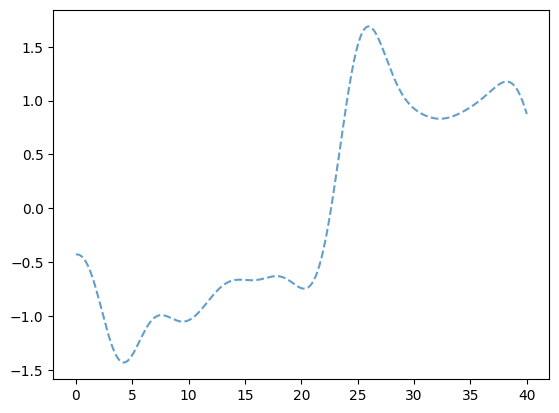

In [5]:
plot_gaussian_process_sample(0, 40, 600, RBF(3), 18)

Reset: {'observation': {'effectiveness': array([1.], dtype=float32), 'duration': 2, 'length': array([2.2308397], dtype=float32)}, 'allowed_actions': array([[ 1.1154199, 38.88458  ]], dtype=float32)}
Action: [8.312897]
Observation: {'observation': {'effectiveness': array([1.], dtype=float32), 'duration': 3, 'length': array([1.9296678], dtype=float32)}, 'allowed_actions': array([[ 0.9648339,  6.2326427],
       [10.39315  , 39.035168 ]], dtype=float32)}
Reward: -1.0127670005964042


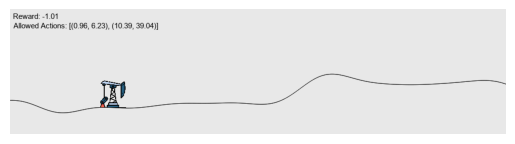

Action: [39.30555]
Observation: {'observation': {'effectiveness': array([1.], dtype=float32), 'duration': 3, 'length': array([1.7763809], dtype=float32)}, 'allowed_actions': array([[ 0.88819045, 39.11181   ]], dtype=float32)}
Reward: -50


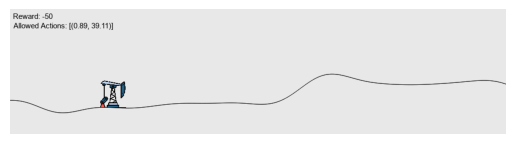

Done!


In [6]:
x_sample, y_sample = sample_from_gaussian_process(0.0, 40.0, 600, RBF(3), 18)

env_config = {
    'LENGTH': 40.0,
    'LENGTH_PUMP': 2.0,
    'LENGTH_PUMP_STD': 1.0,
    'LENGTH_PUMP_MIN': 1.0,
    'LENGTH_PUMP_MAX': 4.0,
    'STEPS_PER_EPISODE': 4,
    'EFFECTIVENESS_MEAN': 1.0,
    'EFFECTIVENESS_STD': 0.0,
    'EFFECTIVENESS_MIN': 0.0,
    'EFFECTIVENESS_MAX': 1.0,
    'DURATION_MEAN': 3,
    'DURATION_MIN': 2,
    'DURATION_MAX': 5,
    'GAUSSIAN_NOISE': 0.0,
    'valid_action_reward': lambda x: np.interp(x, x_sample, y_sample.T[0]),
    'invalid_action_penalty': lambda x: -50,
    'END_ON_COLLISION':  True
}

env = OilField(env_config, 'jupyter')
obs = env.reset()
print(f'Reset: {obs}')
while True:
    action = env.action_space.sample()
    print(f'Action: {action}')
    obs, reward, done, truncated, info = env.step(action)
    print(f'Observation: {obs}')
    print(f'Reward: {reward}')
    env.render()

    if done or truncated:
        break

print(f'Done!')

### Fuel Saving

In [9]:
env_config = {
    'STEPS_PER_EPISODE': 2,
    'DT': 0.1,
    'AGENT_PROFILE': {
        'KP': 3.5, 
        'KD': 1.0,
        'KB': 18.0
    },
    'OTHERS_PROFILE': {
        'KP': 1.0, 
        'KD': 1.0,
        'KB': 1.0
    },
    'MINIMUM_DISTANCE': 1.5,
    'PENALTY_COEFFICIENT': 10.0,
    'COLLISION_REWARD': -10000
}

env = EuclideanProjectionWrapper(FuelSaving(env_config))
obs = env.reset()
while True:
    action = env.action_space.sample()
    print(f'Action: {action}')
    obs, reward, done, info = env.step(action)
    print(f'Observation: {obs}')
    print(f'Reward: {reward}')
    print(f'Info: {info}')
    env.render()

    if done:
        break

print(f'Done!')

Action: [-24.465857]
Observation: {'observation': array([34., 30.,  0., 28., 30.,  0., 22., 30.,  0., 16., 30.,  0., 10.,
       30.,  0.], dtype=float32), 'allowed_actions': array([[-100.,  100.]], dtype=float32)}
Reward: 0
Info: {'fraction_allowed_actions': 1.0, 'allowed_interval_length': 200.0, 'number_intervals': 1, 'interval_avg': 200.0, 'interval_min': 200.0, 'interval_max': 200.0, 'interval_variance': 0.0, 'Executed': array([-24.465857], dtype=float32), 'invalid': False}
Distances: [6.3669878482818625, 5.6330121517181375]
Action: [99.57319]
Observation: {'observation': array([34., 30.,  0., 28., 30.,  0., 22., 30.,  0., 16., 30.,  0., 10.,
       30.,  0.], dtype=float32), 'allowed_actions': array([[-100.,  100.]], dtype=float32)}
Reward: -3191.8575780271676
Info: {'fraction_allowed_actions': 1.0, 'allowed_interval_length': 200.0, 'number_intervals': 1, 'interval_avg': 200.0, 'interval_min': 200.0, 'interval_max': 200.0, 'interval_variance': 0.0, 'Executed': array([99.57319], dt

### Warehouse Pathfinding

Reset: {'observation': {'location': array([1., 1.], dtype=float32), 'perspective': array([90.], dtype=float32), 'target_angle': array([45.], dtype=float32), 'target_distance': array([15.156349], dtype=float32), 'current_step': array([0.], dtype=float32)}, 'allowed_actions': array([[-110.   ,   29.753]], dtype=float32)}
[[-110.      29.753]]
Action: [87.53003]
Observation: {'observation': {'location': array([0.50378, 1.8682 ], dtype=float32), 'perspective': array([119.75], dtype=float32), 'target_angle': array([78.359], dtype=float32), 'target_distance': array([14.923976], dtype=float32), 'current_step': array([1.], dtype=float32)}, 'allowed_actions': array([[-110.   ,  -30.957]], dtype=float32)}
Reward: 1.1618
Info: {'goal_distance': 14.923975684779256, 'solved': False, 'level': 1, 'fraction_allowed_actions': 0.6352409, 'allowed_interval_length': 139.753, 'number_intervals': 1, 'interval_avg': 139.7530059814453, 'interval_min': 139.753, 'interval_max': 139.753, 'interval_variance': 0.0

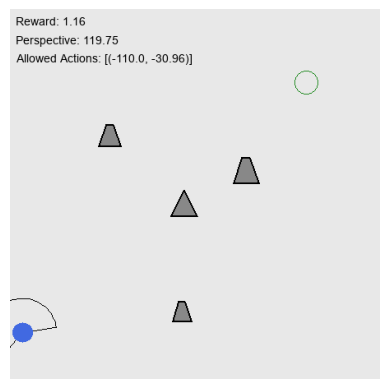

[[-110.     -30.957]]
Action: [81.0265]
Observation: {'observation': {'location': array([0.52484, 2.868  ], dtype=float32), 'perspective': array([88.793], dtype=float32), 'target_angle': array([50.28], dtype=float32), 'target_distance': array([14.265405], dtype=float32), 'current_step': array([2.], dtype=float32)}, 'allowed_actions': array([[-110.    ,    1.2234]], dtype=float32)}
Reward: 3.2428
Info: {'goal_distance': 14.26540439460467, 'solved': False, 'level': 1, 'fraction_allowed_actions': 0.35928637, 'allowed_interval_length': 79.043, 'number_intervals': 1, 'interval_avg': 79.04299926757812, 'interval_min': 79.043, 'interval_max': 79.043, 'interval_variance': 0.0, 'Executed': array([-30.957], dtype=float32), 'invalid': True}
[[1.0, 1.0], [0.50378, 1.8682], [0.52484, 2.868]]


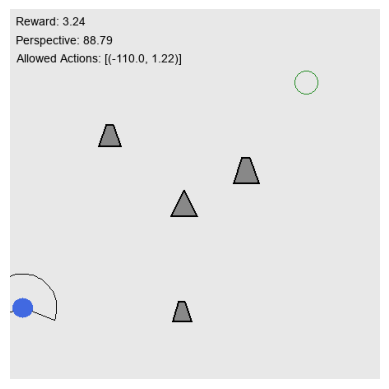

[[-110.        1.2234]]
Action: [-59.323296]
Observation: {'observation': {'location': array([1.3954, 3.36  ], dtype=float32), 'perspective': array([29.47], dtype=float32), 'target_angle': array([350.3], dtype=float32), 'target_distance': array([13.278714], dtype=float32), 'current_step': array([3.], dtype=float32)}, 'allowed_actions': array([[-110.,  110.]], dtype=float32)}
Reward: 4.8334
Info: {'goal_distance': 13.278713847992831, 'solved': False, 'level': 1, 'fraction_allowed_actions': 0.5055609, 'allowed_interval_length': 111.2234, 'number_intervals': 1, 'interval_avg': 111.22339630126953, 'interval_min': 111.2234, 'interval_max': 111.2234, 'interval_variance': 0.0, 'Executed': array([-59.323296], dtype=float32), 'invalid': False}
[[1.0, 1.0], [0.50378, 1.8682], [0.52484, 2.868], [1.3954, 3.36]]


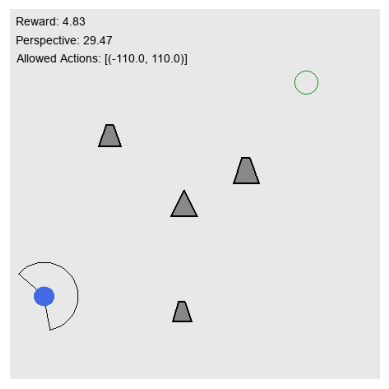

[[-110.  110.]]
Action: [-9.90499]
Observation: {'observation': {'location': array([2.3377, 3.6949], dtype=float32), 'perspective': array([19.565], dtype=float32), 'target_angle': array([338.88], dtype=float32), 'target_distance': array([12.341172], dtype=float32), 'current_step': array([4.], dtype=float32)}, 'allowed_actions': array([[-110.,  110.]], dtype=float32)}
Reward: 4.5377
Info: {'goal_distance': 12.341171761454932, 'solved': False, 'level': 1, 'fraction_allowed_actions': 1.0, 'allowed_interval_length': 220.0, 'number_intervals': 1, 'interval_avg': 220.0, 'interval_min': 220.0, 'interval_max': 220.0, 'interval_variance': 0.0, 'Executed': array([-9.90499], dtype=float32), 'invalid': False}
[[1.0, 1.0], [0.50378, 1.8682], [0.52484, 2.868], [1.3954, 3.36], [2.3377, 3.6949]]


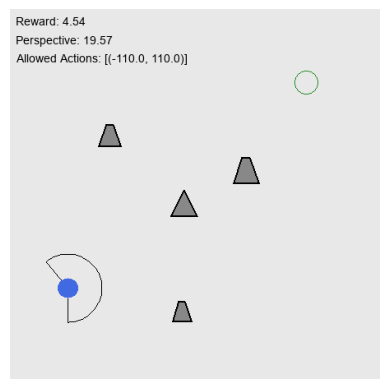

Done!


In [20]:
env_config = {
    'STEPS_PER_EPISODE': 4,
    'ACTION_RANGE': 220,
    'DT': 1.0,
    'SAFETY_DISTANCE': 0.05,
    'REWARD': {
        'TIMESTEP_PENALTY_COEFFICIENT': 0.05,
        'REWARD_COEFFICIENT': 5.0,
        'GOAL': 50,
        'COLLISION': -20.0
    },
    'LEVELS': {
        1: {
            'HEIGHT': 15.0,
            'WIDTH': 15.0,
            'AGENT': {'x': 1.0, 'y': 1.0, 'angle': 90.0, 'step_size': 1.0, 'radius': 0.4},
            'GOAL': {'x': 12.0, 'y': 12.0, 'radius': 0.5},
            'OBSTACLES': {
                **generate_obstacles(15,
                     15,
                     4,
                     [[7.5, 0], [0, 7.5]],
                     mean_size_obstacle=1.0,
                     sigma_size_obstacle=0.25,
                     range_size_obstacle=0.75,
                     seed=43534, 
                     forbidden_circles=[[1.0, 1.0, 0.4], [12.0, 12.0, 0.5]])
            }
        }
    }
}

env = EuclideanProjectionWrapper(ObstacleAvoidance(env_config, render_mode='jupyter'))
obs = env.reset()
print(f'Reset: {obs}')
while True:
    print(env.allowed_actions)
    action = env.action_space.sample()
    print(f'Action: {action}')
    obs, reward, done, info = env.step(action)
    print(f'Observation: {obs}')
    print(f'Reward: {reward}')
    print(f'Info: {info}')
    print(env.trajectory)
    env.render(draw_trajectory = False, draw_information=True)

    if done:
        break
        
print(f'Done!')

##### Manual Debugging

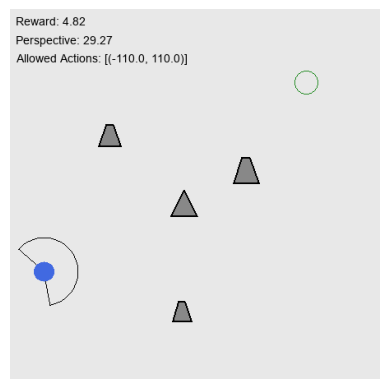

In [17]:
env.step([-60.75])
env.render()